In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [ ]:
df = pd.read_csv("/content/financials.csv")

In [ ]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
# Display basic information about the dataset
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])
print("Data types:\n", df.dtypes)

Number of samples: 505
Number of features: 14
Data types:
 Symbol             object
Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap        float64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
SEC Filings        object
dtype: object


In [ ]:
# Univariate Analysis
# For numerical variables
numerical_features = df.columns[3:-2]  # Assuming the first column is the date
print("\nDescriptive statistics for numerical variables:\n" )
df.describe()



Descriptive statistics for numerical variables:



,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


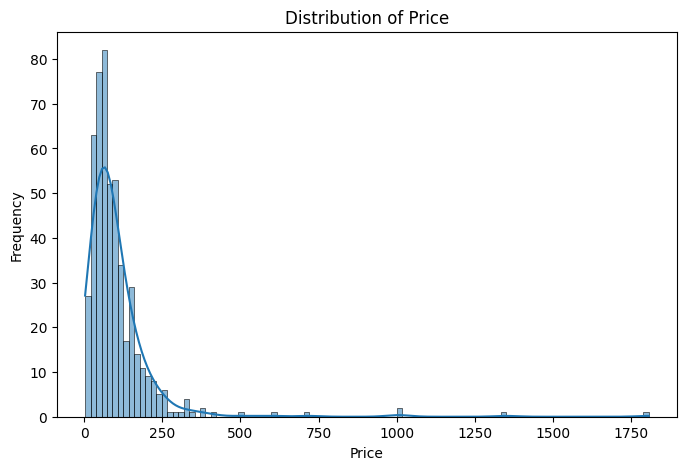

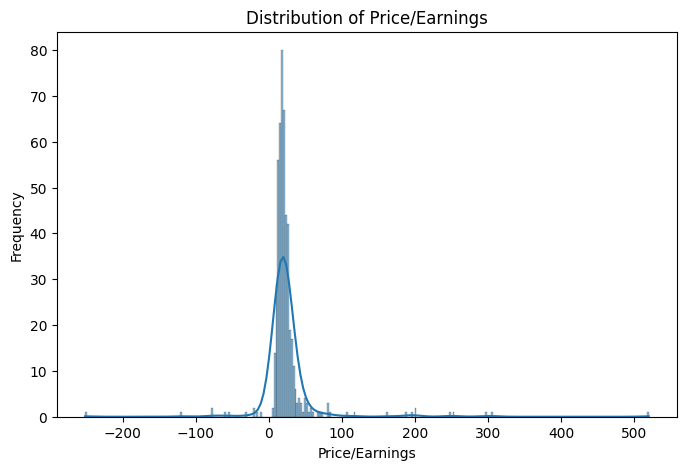

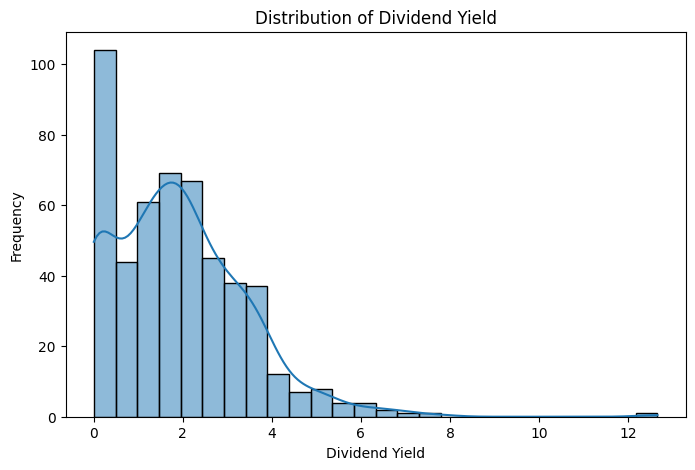

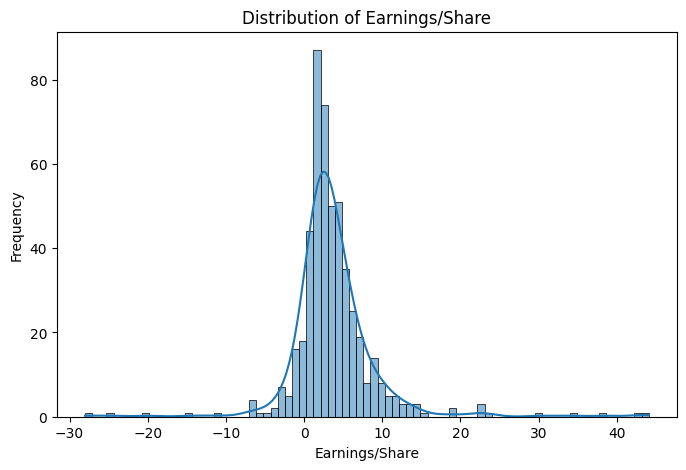

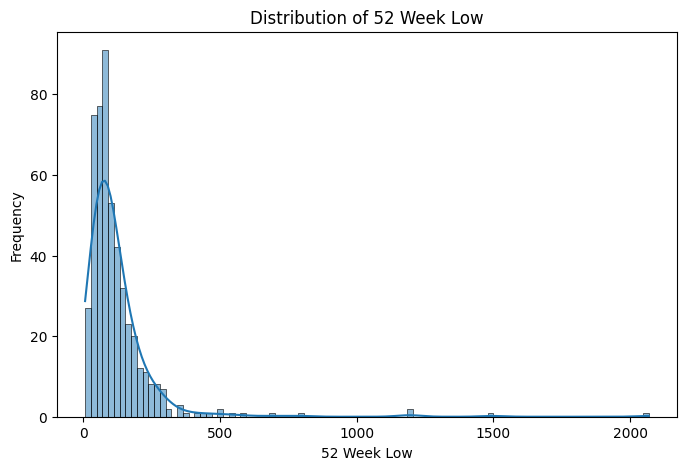

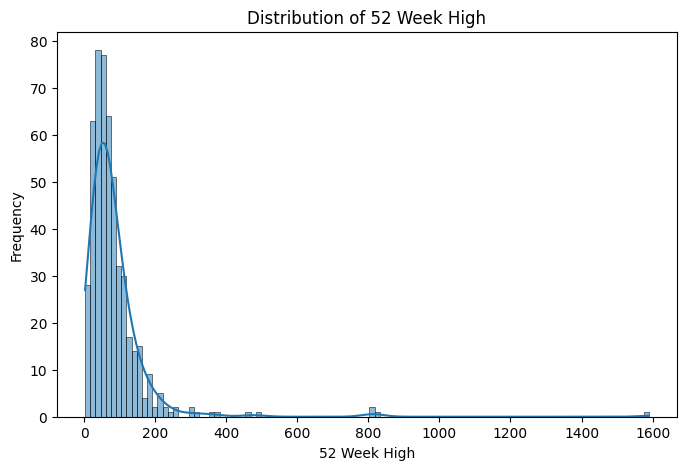

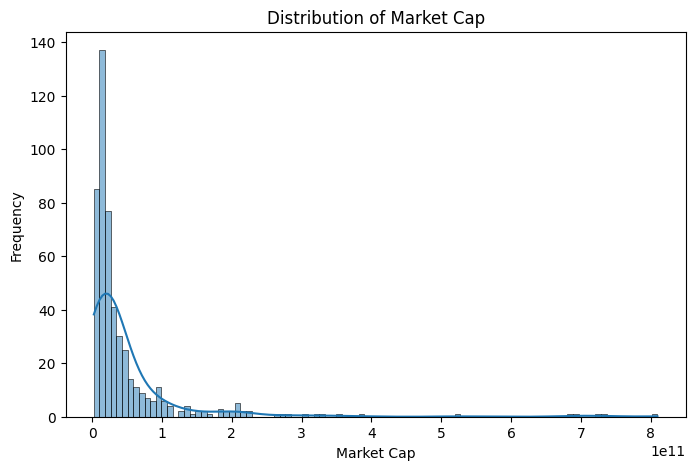

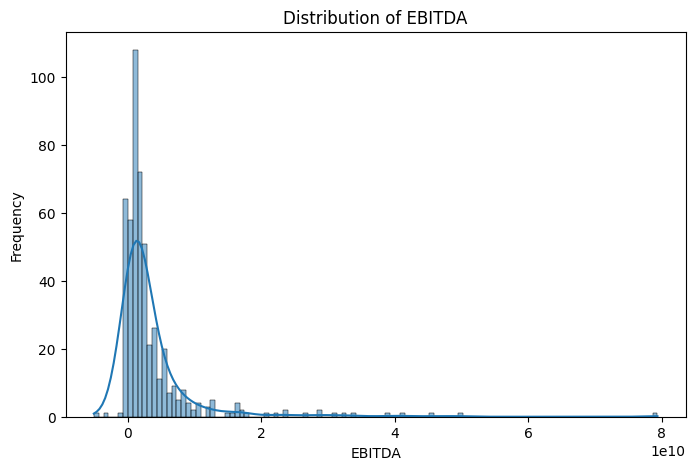

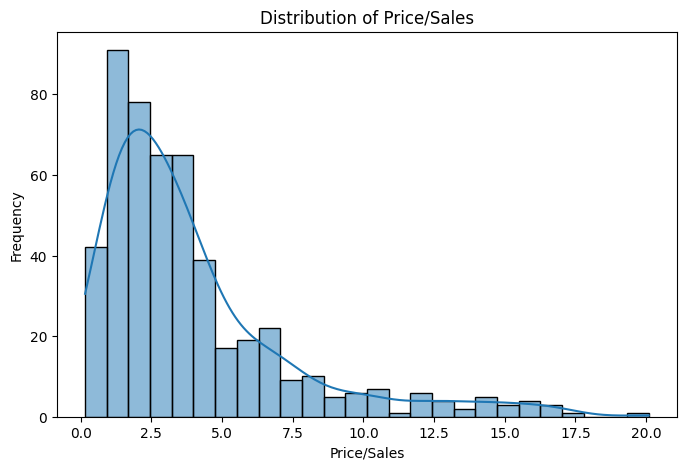

In [ ]:
# Visualize the distribution of numerical variables
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



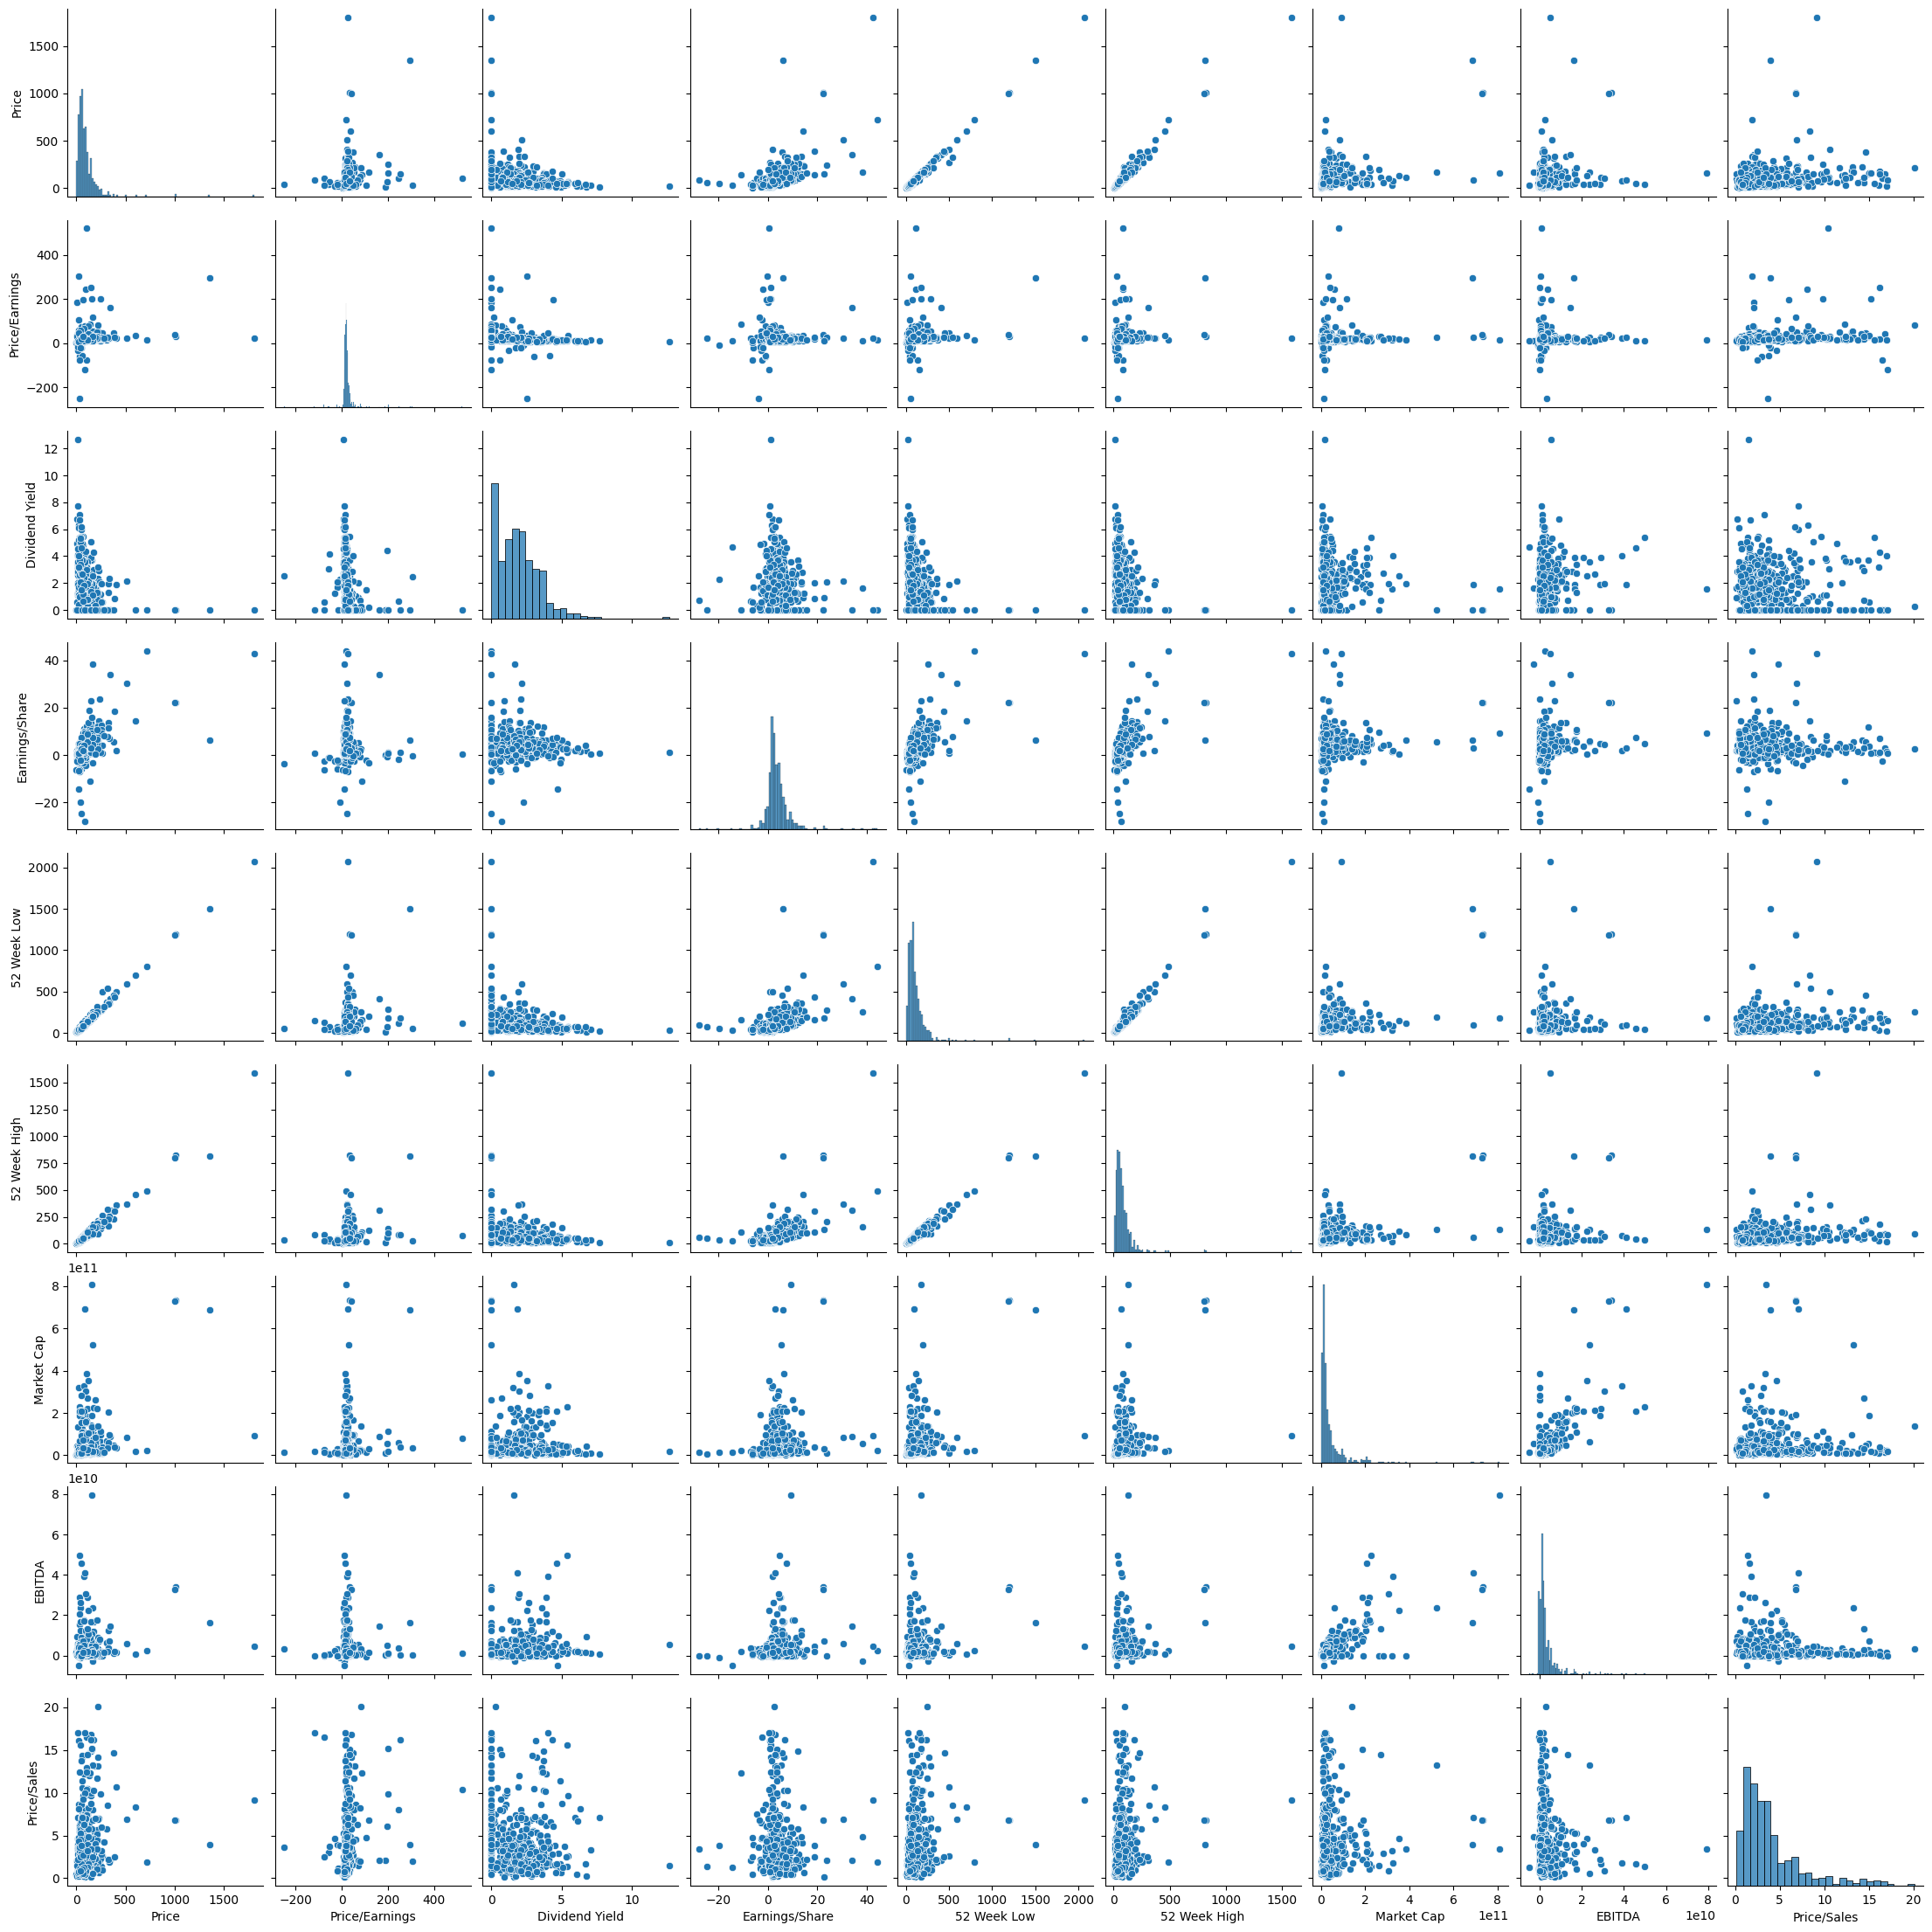

In [ ]:
# Bivariate Analysis
# Scatter plot for numerical variables
sns.pairplot(df[numerical_features])
plt.show()



In [ ]:
# Calculate correlation coefficients between numerical variables
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation matrix between numerical variables:\n")
correlation_matrix



Correlation matrix between numerical variables:



,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales
Price,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625
Price/Earnings,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558
Dividend Yield,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724
Earnings/Share,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178
52 Week Low,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823
52 Week High,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721
Market Cap,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249
EBITDA,0.180321,0.002950,0.126133,0.180583,0.176277,0.179666,0.771344,1.000000,-0.037175
Price/Sales,0.181625,0.188558,-0.077724,-0.036178,0.188823,0.173721,0.095249,-0.037175,1.000000


## Let's interpret the correlation matrix:

- Strong positive correlation with variables such as 52 Week Low (0.995) and 52 Week High (0.983), indicating that the current price is highly correlated with the lowest and highest prices observed over the last 52 weeks.
- Moderate positive correlation with variables like Earnings/Share (0.591) and Market Cap (0.406), suggesting some degree of correlation with earnings per share and market capitalization.
Price/Earnings:

- Weak positive correlation with most variables, indicating limited linear relationship with other variables in the dataset.
Dividend Yield:

- Weak negative correlation with variables such as Price (-0.245), 52 Week Low (-0.244), and 52 Week High (-0.208), indicating a slight negative relationship with these variables.
Earnings/Share:

- Strong positive correlation with Price (0.591), 52 Week Low (0.589), and 52 Week High (0.605), indicating a significant positive relationship with these variables.
Market Cap:

- Moderate positive correlation with variables such as Price (0.406) and EBITDA (0.771), indicating a moderate positive relationship with these variables.
EBITDA:

- Moderate positive correlation with Market Cap (0.771), indicating a strong positive relationship between earnings before interest, taxes, depreciation, and amortization and market capitalization.
Price/Sales:

- Weak positive correlation with Price (0.182) and Price/Earnings (0.189), indicating a slight positive relationship with these variables.

Overall, the correlation matrix provides insights into the relationships between different numerical variables in the dataset. However, it's important to note that correlation does not imply causation, and further analysis may be required to understand the underlying relationships between variables.

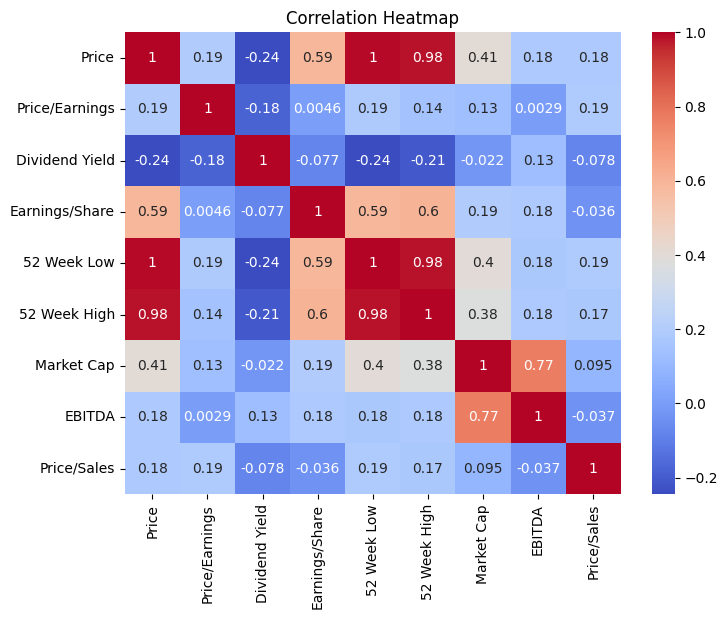

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Separate features (X) and target variable (y)
X = df[numerical_features]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [ ]:
# Drop non-numeric columns if any
X_numeric = X.select_dtypes(include=np.number)
X_numeric.dropna(inplace=True)
# Perform Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [ ]:
# PCA with Scikit-learn
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Interpret the results
print("\nExplained variance ratio:", pca.explained_variance_ratio_)
pca.components_


Explained variance ratio: [0.42842795 0.17631424 0.13575429 0.10002621 0.08389593 0.053414  ]


array([[ 0.49150129,  0.1196174 , -0.13623634,  0.34883961,  0.49061856,
         0.48602754,  0.28586345,  0.18363461,  0.10723724],
       [-0.12662691, -0.14608257,  0.34916641, -0.04553832, -0.13117831,
        -0.12385367,  0.55686129,  0.68545596, -0.16168717],
       [-0.06858876,  0.61912206, -0.24439176, -0.38403407, -0.07137334,
        -0.11560068,  0.24619298,  0.11553274,  0.55888952],
       [ 0.05421054, -0.2429024 ,  0.67604695, -0.00530032,  0.06385806,
         0.09312617, -0.10900211, -0.11172258,  0.66624195],
       [ 0.02704547,  0.71302754,  0.56298921,  0.15245094,  0.01609911,
         0.01864108, -0.13225897, -0.08907712, -0.35302732],
       [ 0.24111966, -0.10545478,  0.14913703, -0.82124068,  0.24460241,
         0.23266227,  0.10323839, -0.17037132, -0.2835769 ]])

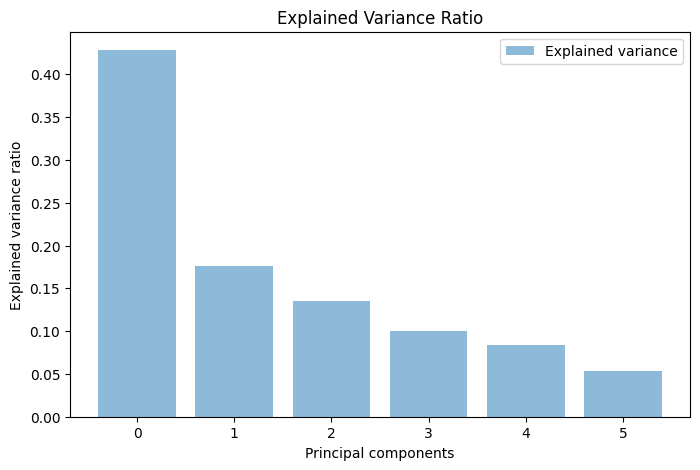

In [ ]:
# Visualize PCA components
plt.figure(figsize=(8, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',label='Explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance Ratio')
plt.show()

Each row of the PCA components matrix corresponds to a principal component, and each column corresponds to a feature from the original dataset.

Let's interpret the PCA components:

*   PC1:

PC1 captures a combination of features that contribute most to the variance in the dataset.
The highest positive weights are associated with features such as Price, 52 Week Low, 52 Week High, Market Cap, and EBITDA.
This suggests that PC1 represents a measure of overall size or scale of the companies, as these features are related to the financial size and performance of the companies.

*   PC2:

PC2 captures another set of features that contribute to the variance, with different weights compared to PC1.
The highest positive weights are associated with features such as Dividend Yield, Price/Sales, and Price/Book.
This suggests that PC2 represents a measure of financial performance and valuation metrics, as these features are related to dividends, sales, and book value.
* PC3 to PC6:

PC3 to PC6 capture additional variance in the dataset, each representing a combination of features with different weights.
These components might represent other aspects of financial metrics or relationships among the features.
Overall, the PCA components provide insights into the underlying structure of the financial data and can be used for dimensionality reduction or feature selection in further analysis.